<a href="https://colab.research.google.com/github/69421/testRepo/blob/main/Hands_on_Lab_11_Exploratory_Data_Analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Check the number of missing values in the specified columns
print("Missing values before handling:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Strategy: Drop rows with missing values in these columns
df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Missing values before handling:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


<ipython-input-5-4312c5740994>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)


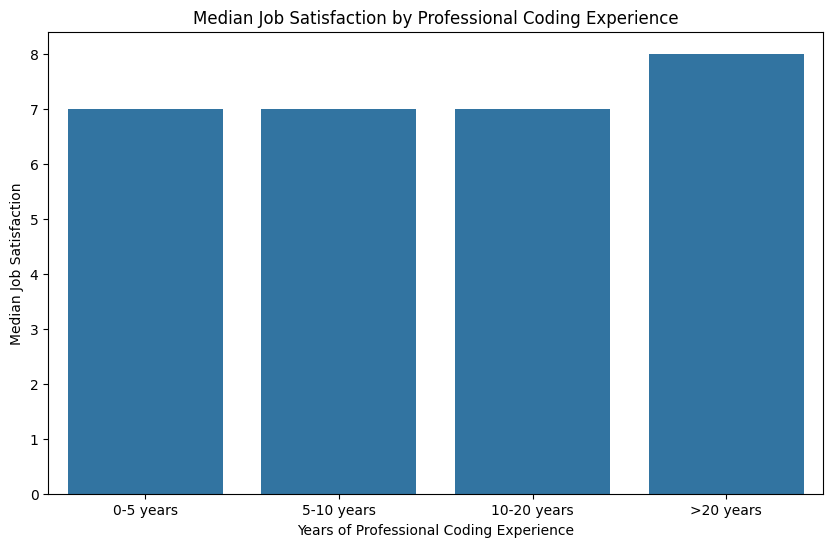

In [5]:
## Write your code here
import numpy as np

# Convert 'YearsCodePro' to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create a new column for experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each experience range
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=median_jobsat_by_experience.index, y=median_jobsat_by_experience.values)
plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


Text(0, 0.5, 'Count')

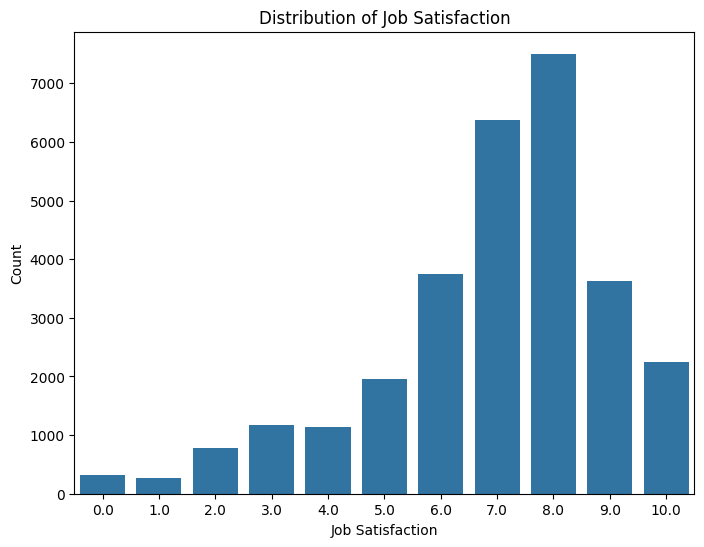

In [6]:
## Write your code here
# Count plot of JobSat
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


Text(0, 0.5, 'Count')

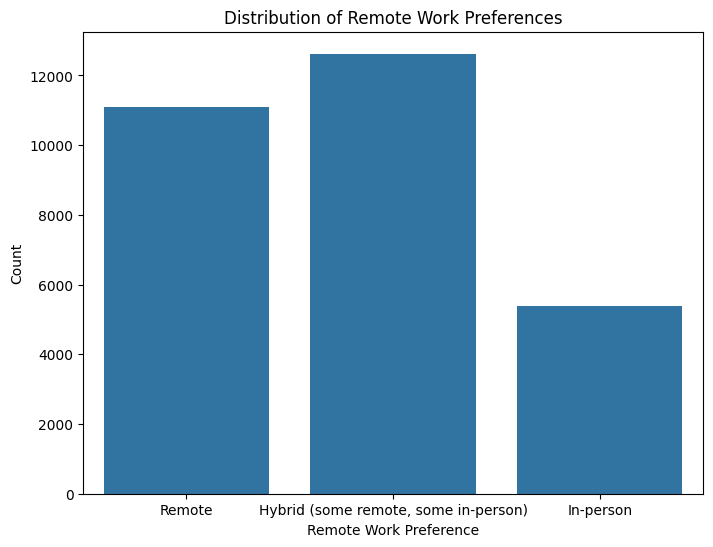

In [7]:
## Write your code here
# Count plot of RemoteWork
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


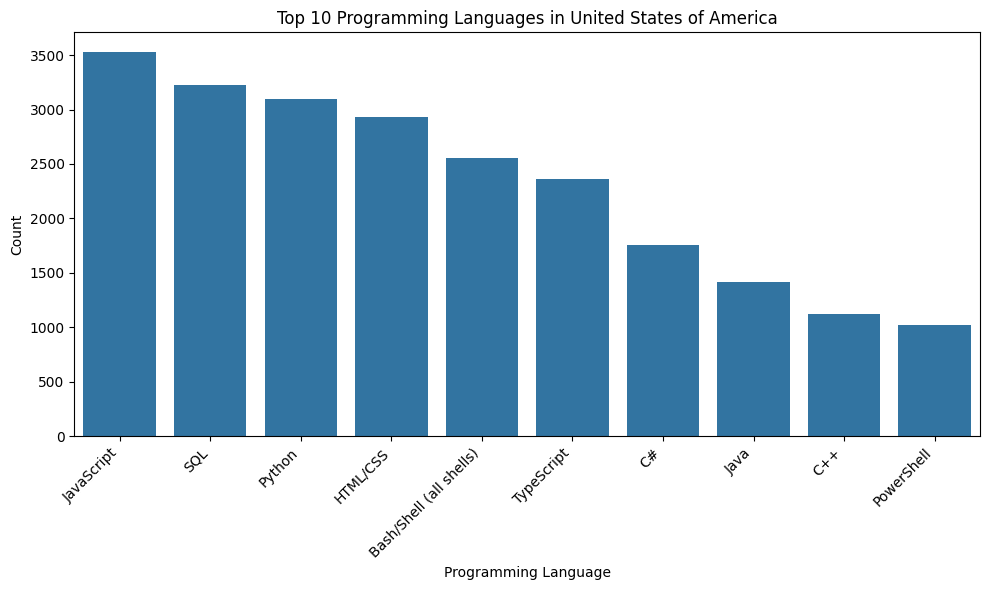

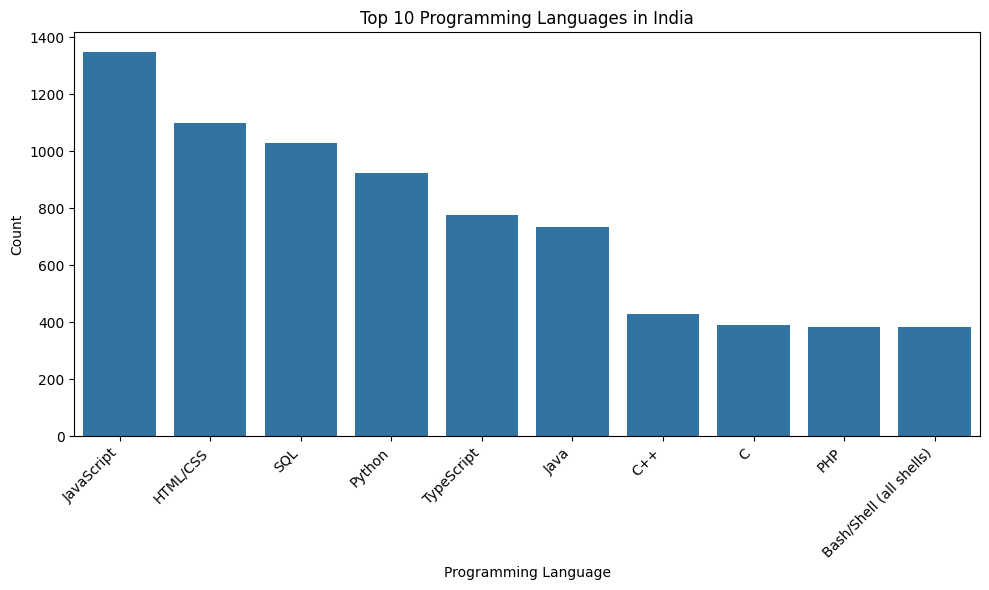

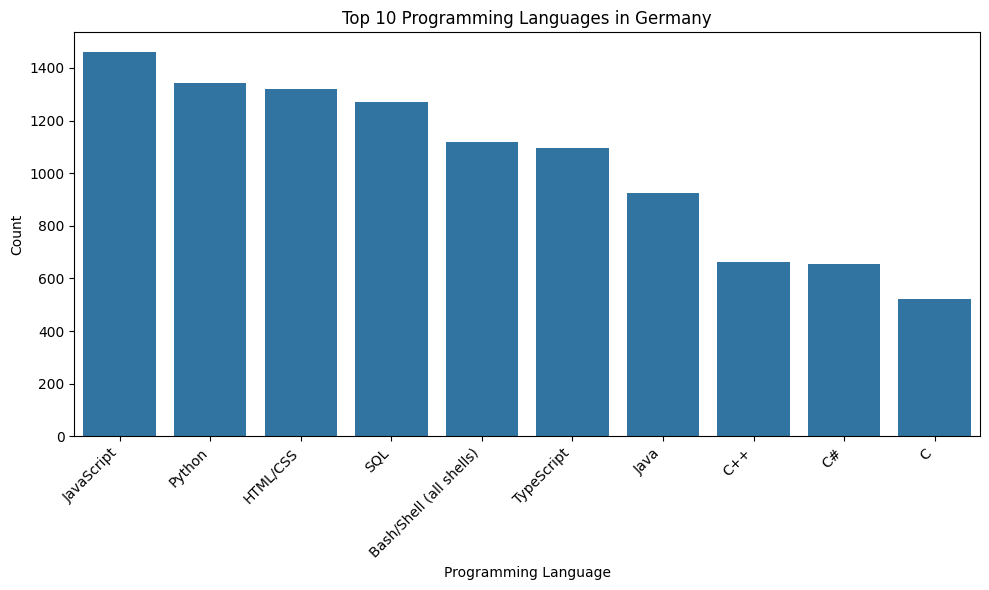

In [8]:
## Write your code here
# Assuming the 'Country' column exists in your DataFrame

# Function to count language occurrences
def count_languages(language_string):
    if isinstance(language_string, str):
        return [lang.strip() for lang in language_string.split(';')]
    return []

# Apply the function to the 'LanguageHaveWorkedWith' column
all_languages = df['LanguageHaveWorkedWith'].apply(count_languages).sum()

# Get unique languages
unique_languages = pd.Series(all_languages).unique()

# Create a dictionary to store language counts per country
language_counts_by_country = {}

# Iterate through countries and count languages
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    country_languages = country_df['LanguageHaveWorkedWith'].apply(count_languages).sum()
    language_counts_by_country[country] = pd.Series(country_languages).value_counts()

# Example: Visualize top 10 languages in a few countries
countries_to_visualize = ['United States of America', 'India', 'Germany']

for country in countries_to_visualize:
    if country in language_counts_by_country:
        top_languages = language_counts_by_country[country].head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_languages.index, y=top_languages.values)
        plt.title(f'Top 10 Programming Languages in {country}')
        plt.xlabel('Programming Language')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Data for {country} not found.")

# Example: Create a heatmap (requires reshaping data)
# This is a more advanced visualization and requires preparing the data appropriately
# You would typically select a subset of popular languages and countries for a heatmap

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


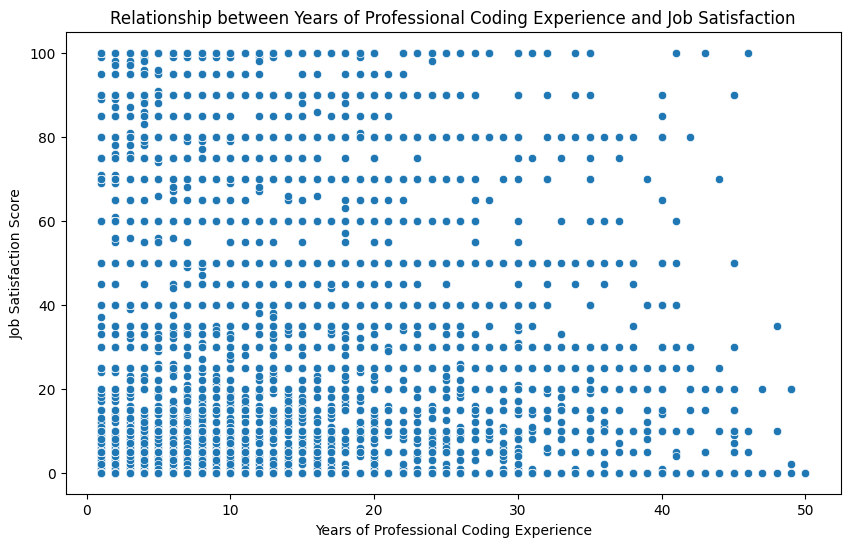

In [9]:
## Write your code here
## Write your code here

# Ensure YearsCodePro is numeric (if not already done)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Assuming JobSatPoints_1 is a numerical representation of JobSat
# If JobSatPoints_1 doesn't exist, you would need to create a numerical mapping
# for JobSat (e.g., assigning numerical values to satisfaction levels).
# For this example, we assume JobSatPoints_1 exists and is numeric.
# If you don't have JobSatPoints_1, you might need to map JobSat categories to numbers.
# Example mapping (adjust as needed based on your JobSat categories):
# job_sat_mapping = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neutral': 3, 'Satisfied': 4, 'Very satisfied': 5}
# df['JobSatNumerical'] = df['JobSat'].map(job_sat_mapping)
# Then use 'JobSatNumerical' for plotting

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.title('Relationship between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


<ipython-input-12-1dad97018fee>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


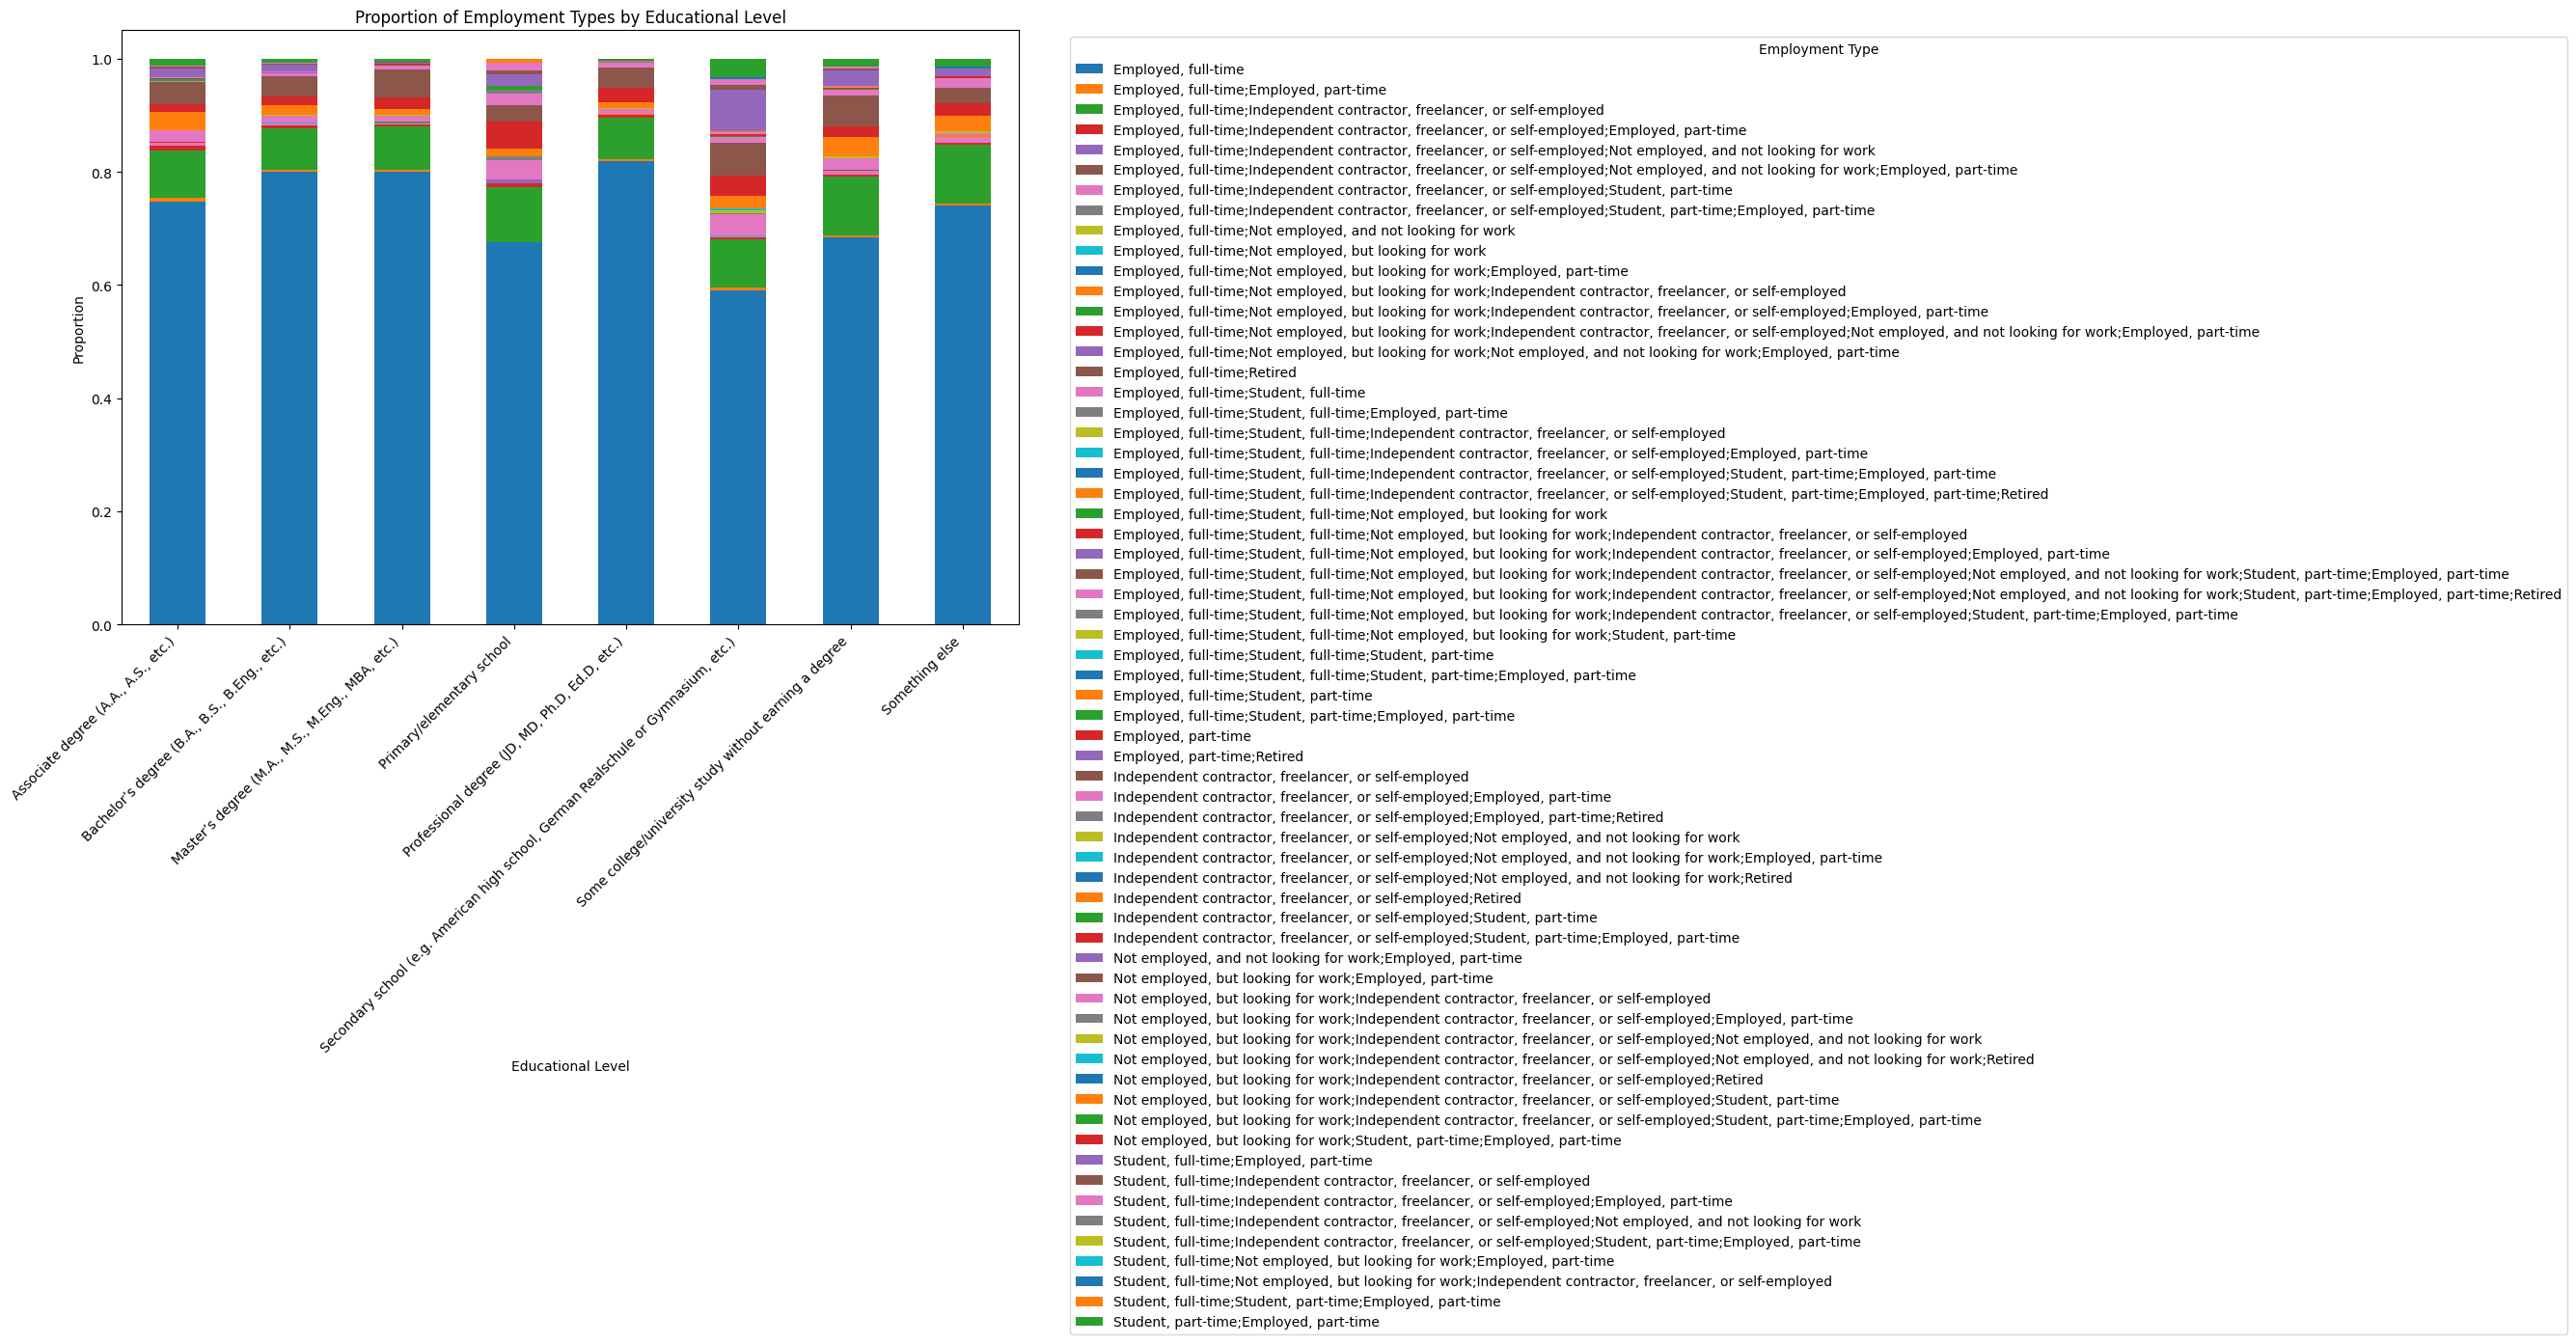

In [12]:
## Write your code here
# Create a cross-tabulation of EdLevel and Employment
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])


# Normalize the cross-tabulation to show proportions (e.g., by row)
cross_tab_normalized = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')


# Visualize the relationship using a stacked bar chart
cross_tab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Employment Types by Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [13]:
## Write your code here
# Save the modified dataset to a new CSV file
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
